In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [4]:
stops = pd.read_csv("CTA_-_System_Information_-_List_of__L__Stops.csv")
stops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [81]:
data = pd.read_csv("CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv")
data.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,01/01/2001,U,290
1,40020,Harlem-Lake,01/01/2001,U,633
2,40030,Pulaski-Lake,01/01/2001,U,483
3,40040,Quincy/Wells,01/01/2001,U,374
4,40050,Davis,01/01/2001,U,804


In [6]:
data.shape

(809326, 5)

In [7]:
data.columns

Index([u'station_id', u'stationname', u'date', u'daytype', u'rides'], dtype='object')

In [82]:
data.rides.describe()

count    809326.000000
mean       3275.253554
std        3144.853450
min           0.000000
25%        1112.000000
50%        2300.000000
75%        4329.000000
max       36323.000000
Name: rides, dtype: float64

In [138]:
data["datetime"] = pd.to_datetime(data.date)

In [139]:
data["year"] = data.datetime.apply(lambda x:x.year)

In [140]:
#Average number of rides per day per station of each year.
data.groupby("year").mean()["rides"]

year
2001    2934.432450
2002    2939.698090
2003    2900.242717
2004    2853.698376
2005    2990.298225
2006    3124.951399
2007    3046.560776
2008    3180.381032
2009    3247.157740
2010    3372.427086
2011    3536.449225
2012    3644.214308
2013    3595.699336
2014    3732.673417
2015    3767.911111
2016    3696.030125
Name: rides, dtype: float64

In [141]:
#A plot of the rolling mean of the ridership from 2001 to 2016

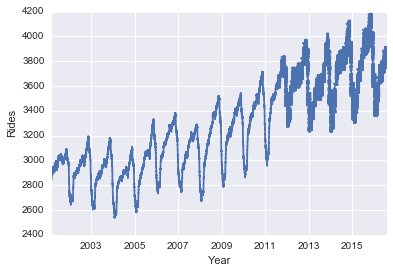

In [142]:
plt.plot(data.datetime, pd.rolling_mean(data.rides, window=10000))
plt.xlabel("Year")
plt.ylabel("Rides")
plt.show()

In [14]:
data["day_of_week"] = data.datetime.apply(lambda x:x.dayofweek)

In [15]:
#Average number of daily rides per station of each day of the week.
data.groupby("day_of_week").mean()["rides"]

day_of_week
0    3601.978127
1    3864.229803
2    3873.203376
3    3848.171019
4    3855.418147
5    2243.918711
6    1639.943373
Name: rides, dtype: float64

In [17]:
#Filtered data to the year 2015, the latest full year in the data
df_2015 = data[data.year == 2015]
df_2015.shape

(52560, 8)

In [18]:
df15 = pd.DataFrame(df_2015.groupby("station_id").sum()["rides"])

In [19]:
df15.reset_index(inplace=True)

In [20]:
stops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [ ]:
#Merge stop information dataframe with the 2015 dataframe for the purpose of uploading to Carto DB.

In [21]:
stops_merge = stops[["STATION_NAME", "STATION_DESCRIPTIVE_NAME", "MAP_ID", "Location"]]

In [22]:
stops_merge.columns = [i.lower() for i in stops_merge.columns]

In [23]:
stops_merge.rename(columns={"map_id": "station_id"}, inplace=True)

In [24]:
merged = pd.merge(df15, stops_merge, on="station_id")

In [25]:
merged = merged.drop_duplicates()

In [28]:
merged.to_csv("chicago_subway_data.csv")

In [29]:
#The top ten most popular stations of 2015.
df_2015.groupby("stationname").sum()["rides"].sort_values(ascending=False)[:10]

stationname
Lake/State             7011372
Clark/Lake             5997069
Chicago/State          5262538
Belmont-North Main     4353356
Grand/State            4349630
Fullerton              4233730
O'Hare Airport         4053704
Roosevelt              3816017
95th/Dan Ryan          3676215
Washington/Dearborn    3633658
Name: rides, dtype: int64

In [30]:
#The top ten least popular stations of 2015.
df_2015.groupby("stationname").sum()["rides"].sort_values(ascending=True)[:10]

stationname
Oakton-Skokie       149883
Kostner             174320
King Drive          211184
Halsted/63rd        248113
South Boulevard     254618
Noyes               257335
Central-Evanston    260517
Foster              282795
Indiana             297134
Dempster            299417
Name: rides, dtype: int64

In [ ]:
#A look at the most popular stations on for each line.

In [105]:
stops_filtered = stops[['STATION_NAME','STATION_DESCRIPTIVE_NAME', 'MAP_ID']]

In [106]:
stops_filtered.rename(columns={"MAP_ID":"station_id"}, inplace=True)

In [107]:
df_2015.rename(columns={"station_id":"MAP_ID"}, inplace=True)

In [108]:
df_2015_lines = pd.merge(df15, stops_filtered, on="station_id").drop_duplicates()

In [123]:
df_2015_lines.head()

,station_id,rides,STATION_NAME,STATION_DESCRIPTIVE_NAME
0,40010,634972,Austin,Austin (Blue Line)
2,40020,1266361,Harlem/Lake,Harlem/Lake (Green Line)
4,40030,566019,Pulaski,Pulaski (Green Line)
6,40040,2193097,Quincy/Wells,"Quincy/Wells (Brown, Orange, Purple & Pink Lines)"
8,40050,1247161,Davis,Davis (Purple Line)


In [114]:
#Top five most trafficked stations on Red line
df_2015_lines[df_2015_lines.STATION_DESCRIPTIVE_NAME.str.contains("Red")].sort_values("rides", ascending=False)[["STATION_NAME","rides"]].head()

,STATION_NAME,rides
292,Lake,7011372
280,Chicago,5262538
254,Belmont,4353356
64,Grand,4349630
232,Fullerton,4233730


In [115]:
#Top five most trafficked stations on Blue line
df_2015_lines[df_2015_lines.STATION_DESCRIPTIVE_NAME.str.contains("Blue")].sort_values("rides", ascending=False)[["STATION_NAME","rides"]].head()

,STATION_NAME,rides
74,Clark/Lake,5997069
170,O'Hare,4053704
72,Washington,3633658
12,Jackson,2401761
196,Logan Square,2315219


In [116]:
#Top five most trafficked stations on Pink line
df_2015_lines[df_2015_lines.STATION_DESCRIPTIVE_NAME.str.contains("Pink")].sort_values("rides", ascending=False)[["STATION_NAME","rides"]].head()

,STATION_NAME,rides
74,Clark/Lake,5997069
50,State/Lake,3295794
38,Randolph/Wabash,2976392
130,Adams/Wabash,2788254
6,Quincy/Wells,2193097


In [117]:
#Top five most trafficked stations on Brown line
df_2015_lines[df_2015_lines.STATION_DESCRIPTIVE_NAME.str.contains("Brown")].sort_values("rides", ascending=False)[["STATION_NAME","rides"]].head()

,STATION_NAME,rides
74,Clark/Lake,5997069
254,Belmont,4353356
232,Fullerton,4233730
50,State/Lake,3295794
38,Randolph/Wabash,2976392


In [118]:
#Top five most trafficked stations on Green line
df_2015_lines[df_2015_lines.STATION_DESCRIPTIVE_NAME.str.contains("Green")].sort_values("rides", ascending=False)[["STATION_NAME","rides"]].head()

,STATION_NAME,rides
74,Clark/Lake,5997069
268,Roosevelt,3816017
50,State/Lake,3295794
38,Randolph/Wabash,2976392
130,Adams/Wabash,2788254


In [119]:
#Top five most trafficked stations on Purple line
df_2015_lines[df_2015_lines.STATION_DESCRIPTIVE_NAME.str.contains("Purple")].sort_values("rides", ascending=False)[["STATION_NAME","rides"]].head()

,STATION_NAME,rides
74,Clark/Lake,5997069
254,Belmont,4353356
232,Fullerton,4233730
50,State/Lake,3295794
38,Randolph/Wabash,2976392


In [122]:
#Top five most trafficked stations on Orange line
df_2015_lines[df_2015_lines.STATION_DESCRIPTIVE_NAME.str.contains("Orange")].sort_values("rides", ascending=False)[["STATION_NAME","rides"]].head()

,STATION_NAME,rides
74,Clark/Lake,5997069
268,Roosevelt,3816017
50,State/Lake,3295794
38,Randolph/Wabash,2976392
180,Midway,2845857


In [132]:
df_2015.head()

,MAP_ID,stationname,date,daytype,rides,datetime,year,day_of_week
726094,40010,Austin-Forest Park,01/01/2015,U,587,2015-01-01,2015,3
726095,40010,Austin-Forest Park,01/02/2015,W,1386,2015-01-02,2015,4
726096,40010,Austin-Forest Park,01/03/2015,A,785,2015-01-03,2015,5
726097,40010,Austin-Forest Park,01/04/2015,U,625,2015-01-04,2015,6
726098,40010,Austin-Forest Park,01/05/2015,W,1752,2015-01-05,2015,0


In [ ]:
d

In [133]:
day_of_week = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
df_2015["day_of_week"] = df_2015.day_of_week.map(day_of_week)

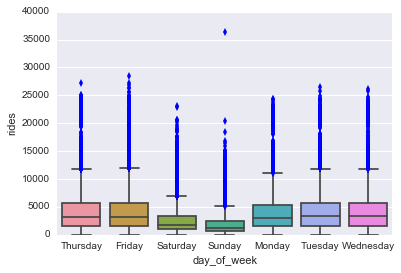

In [136]:
#Boxplot of rides group by day of the week
sb.boxplot(x="day_of_week", y="rides", data=df_2015)